## Importation of libraries and the dataset

In [105]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split as tts
from dython.nominal import associations
from sklearn.neighbors import KNeighborsClassifier  # model KNN
from sklearn.metrics import accuracy_score, confusion_matrix  #metriques
from sklearn.linear_model import LogisticRegression
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 5
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [106]:
data = pd.read_csv(r'train.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [108]:
# In this dataset, we have 6 numericals columns and 5 categorials 

<Axes: ylabel='Density'>

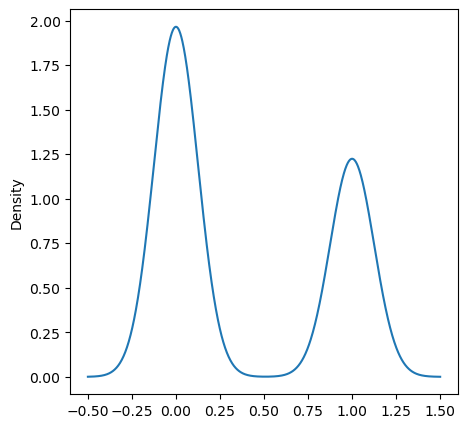

In [109]:
data['Survived'].plot(kind='density')

## Duplicated data

In [110]:
data.duplicated().sum()

0

In [111]:
# There are not any duplicated data in the dataset

## Missing data

In [112]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [113]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


In [114]:
# We notice that there are:
#  177 missing data for the variable "Age" representing 20% of the total
#  687 for "Cabin" representing 77% of the data 
#  2 for "Embarked" representing 0.22% of the total

## Handling missing values

### Outlier data

<Axes: >

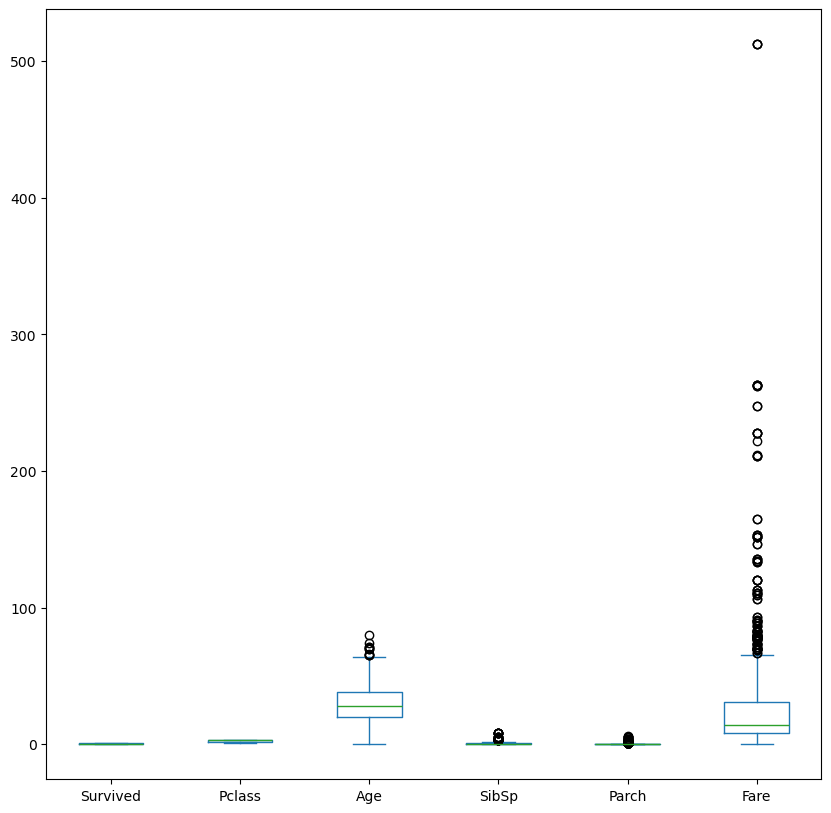

In [115]:
# Boxplot
data.plot(kind='box',figsize=(10,10))

In [116]:
# Selection of the numerical variables
num_col = data.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [117]:
# Calculating of the first and the third quantile
q1 = data.quantile(0.25,numeric_only=True)
q3 = data.quantile(0.75,numeric_only=True)
low = q1-1.5*(q3-q1)
high = q3+1.5*(q3-q1)

In [118]:
# Outlier percentage per numerical columns
(((data[num_col]<low)|(data[num_col]>high)).sum()/data.shape[0]*100)

Survived     0.000000
Pclass       0.000000
Age          1.234568
SibSp        5.162738
Parch       23.905724
Fare        13.019080
dtype: float64

We notice that the variable "Age'  only has 1.23% of outliers, so we will impute all the missing values found by the mean 

In [119]:
# Imputation by the mean
data['Age']=data['Age'].fillna(data['Age'].mean())

For the traitement of the missing values in the column "Cabin", we will create a new column "Hascabin" because considering the context we noticed that the abscence of the values its also an information and we think it will better for the model

In [120]:
data['Hascabin'] = data['Cabin'].apply(lambda x : 0 if pd.isna(x) else 1)

In [121]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [122]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hascabin
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0


## Separation between the target('Survived') and the features

In [123]:
# The variable name has many values zhich can be a problem for our model if we want to apply it on another dataset
# 1. Extract the title using a regular expression
data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# 2. Replace rare titles with 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
               'Rev', 'Sir', 'Jonkheer', 'Dona']
data['Title'] = data['Title'].replace(rare_titles, 'Rare')

# 3. Standardize similar titles
data['Title'] = data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,Rare
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,Miss


In [124]:
features = data.drop(columns=['Survived','Name','Cabin'])
features

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,
1,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,Mr
2,1,female,38.000000,1,0,PC 17599,71.2833,C,1,Mrs
3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Miss
4,1,female,35.000000,1,0,113803,53.1000,S,1,Mrs
5,3,male,35.000000,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.000000,0,0,211536,13.0000,S,0,Rare
888,1,female,19.000000,0,0,112053,30.0000,S,1,Miss
889,3,female,29.699118,1,2,W./C. 6607,23.4500,S,0,Miss


In [125]:
target = data['Survived']
target

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

## Standardisation and Encoding

## Standardisation

In [126]:
features.mean(numeric_only=True)

Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Hascabin     0.228956
dtype: float64

In [127]:
# We notice that not all the values are on the scale

In [128]:
# Standardisation function
def standart(a):
    std_a = (a-a.mean())/a.std()
    return std_a

In [129]:
# Extraction of the numerical columns of features
n_col = features.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [130]:
features[n_col] = features[n_col].apply(standart)
features

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,
1,0.826913,male,-0.592148,0.432550,-0.473408,A/5 21171,-0.502163,S,-0.544619,Mr
2,-1.565228,female,0.638430,0.432550,-0.473408,PC 17599,0.786404,C,1.834085,Mrs
3,0.826913,female,-0.284503,-0.474279,-0.473408,STON/O2. 3101282,-0.488580,S,-0.544619,Miss
4,-1.565228,female,0.407697,0.432550,-0.473408,113803,0.420494,S,1.834085,Mrs
5,0.826913,male,0.407697,-0.474279,-0.473408,373450,-0.486064,S,-0.544619,Mr
...,...,...,...,...,...,...,...,...,...,...
887,-0.369158,male,-0.207592,-0.474279,-0.473408,211536,-0.386454,S,-0.544619,Rare
888,-1.565228,female,-0.822881,-0.474279,-0.473408,112053,-0.044356,S,1.834085,Miss
889,0.826913,female,0.000000,0.432550,2.007806,W./C. 6607,-0.176164,S,-0.544619,Miss


## Encoding

In [131]:
features['Ticket'].nunique()  # We have 681 unique 

681

In [132]:
from category_encoders.hashing import HashingEncoder  # Importing the HashingEncoder class from the category_encoders library

# Initialize the HashingEncoder with specified parameters
he = HashingEncoder(cols=['Ticket'], n_components=10)  # We choose 'Ticket' as the column to be encoded and set n_components=10.
# n_components specifies the number of output features (i.e., the dimensionality of the encoded feature). A smaller value will result in fewer features, 
# but may lead to information loss due to collisions in the hashing process.

# Apply the encoder to the dataset
features = he.fit_transform(features)  # Fit the encoder on the dataframe and transform the 'Ticket' column accordingly
features

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0.826913,male,-0.592148,0.432550,-0.473408,-0.502163,S,-0.544619,Mr
2,0,0,0,1,0,0,0,0,0,0,-1.565228,female,0.638430,0.432550,-0.473408,0.786404,C,1.834085,Mrs
3,1,0,0,0,0,0,0,0,0,0,0.826913,female,-0.284503,-0.474279,-0.473408,-0.488580,S,-0.544619,Miss
4,0,0,0,0,0,0,0,0,0,1,-1.565228,female,0.407697,0.432550,-0.473408,0.420494,S,1.834085,Mrs
5,0,0,0,0,0,0,0,0,1,0,0.826913,male,0.407697,-0.474279,-0.473408,-0.486064,S,-0.544619,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,1,0,-0.369158,male,-0.207592,-0.474279,-0.473408,-0.386454,S,-0.544619,Rare
888,1,0,0,0,0,0,0,0,0,0,-1.565228,female,-0.822881,-0.474279,-0.473408,-0.044356,S,1.834085,Miss
889,0,0,0,0,0,0,0,0,0,1,0.826913,female,0.000000,0.432550,2.007806,-0.176164,S,-0.544619,Miss


 The Hashing Encoder is a suitable option for this case where you have many unique values in a categorical variable (Ticket). It helps reduce dimensionality and improve the model’s performance by avoiding a sparse matrix (which would occur with One-Hot Encoding), while also handling potential scalability issues.

In [133]:
features = pd.get_dummies(features)

In [134]:
features

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,True,False,False,True,False,False,True,False,False,False
2,0,0,0,1,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
3,1,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False
4,0,0,0,0,0,0,0,0,0,1,...,False,False,False,True,False,False,False,True,False,False
5,0,0,0,0,0,0,0,0,1,0,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
888,1,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False
889,0,0,0,0,0,0,0,0,0,1,...,False,False,False,True,False,True,False,False,False,False


## Correlation Visualisation

d:\utilisateur\elong\python_2\Lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
d:\utilisateur\elong\python_2\Lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
d:\utilisateur\elong\python_2\Lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
d:\utilisateur\elong\python_2\Lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if 

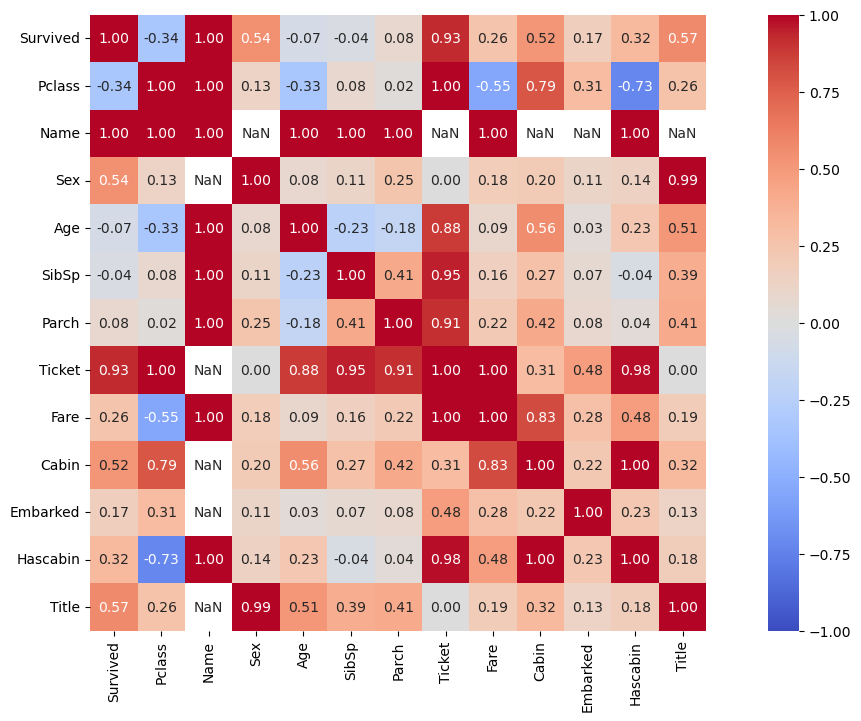

In [135]:
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)
r = associations(data, ax = ax, cmap = "coolwarm")

## PCA

In [136]:
##### Principal Component Analysis #####
from sklearn.decomposition import PCA
# Fit PCA to the data (features)
pca = PCA().fit(features)  # Fit PCA to the features

# Explained variance ratio as a percentage
imp = pca.explained_variance_ratio_ * 100  # Explained variance in percentag

In [137]:
imp.cumsum().round(1) 

array([ 28. ,  48.8,  58.2,  66.4,  72.9,  78.9,  82.4,  85.4,  87.3,
        88.6,  89.9,  91.2,  92.4,  93.6,  94.7,  95.9,  97. ,  98. ,
        98.9,  99.7, 100. , 100. , 100. , 100. , 100. , 100. , 100. ])

To explain 95% of variance, you need to keep at least 16 components with 95.9% variance.

In [138]:
# Projecting the features onto the principal components
X_projected = pd.DataFrame(pca.transform(features), columns=['PCA' + str(i+1) for i in range(features.shape[1])])

# Selecting the first 16 principal components as new features
new_features = X_projected[['PCA' + str(i+1) for i in range(0, 16)]]

new_features

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16
0,1.345881,0.001291,0.007778,0.787362,-0.142213,-0.087237,0.171262,0.232103,0.105020,0.026834,-0.213917,-0.520110,0.686451,-0.009069,-0.229908,-0.079522
1,-2.732576,-0.005090,-0.290957,-0.253978,-1.151575,-0.258380,-0.761459,-0.262730,0.837057,-0.043388,-0.032816,-0.035252,0.069314,0.196874,0.335552,-0.347437
2,1.016970,-0.074160,-0.815178,-1.038393,-0.583723,0.266768,0.368897,0.480459,-0.367575,-0.150265,-0.211509,-0.496747,0.639297,0.051529,-0.171430,-0.043546
3,-2.370534,-0.002967,-0.325520,-0.266399,-1.112928,-0.826023,0.387359,0.169574,0.778456,0.237219,0.905760,-0.130358,-0.099319,-0.205043,-0.256428,-0.005629
4,1.064810,-0.944590,0.434784,0.120898,0.217357,0.136211,0.100263,0.351087,0.065510,-0.108142,-0.028852,-0.013622,-0.037759,0.033687,0.046593,-0.016584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.389946,-0.606860,-0.267604,0.071368,0.017141,-0.131094,0.601453,-0.567486,0.018629,0.080837,-0.114209,-0.070535,0.018902,-0.058707,0.125810,0.176465
887,-1.794179,-0.079095,-1.788212,-0.370794,-0.584195,-1.256766,0.468205,0.146033,-0.469217,0.064134,-0.170885,-0.535508,0.628615,0.104275,-0.225482,-0.012145
888,0.610511,1.863123,0.501772,-1.497483,0.422726,0.026948,0.124305,0.293516,-0.577899,-0.271034,0.956351,-0.006682,-0.023922,0.007855,-0.108034,0.052820
889,-1.816004,-0.888468,-0.838636,0.809522,0.218746,-1.087640,-0.959599,-0.554986,0.137925,-0.112977,-0.081165,-0.089695,-0.003456,0.122126,0.382133,0.821870


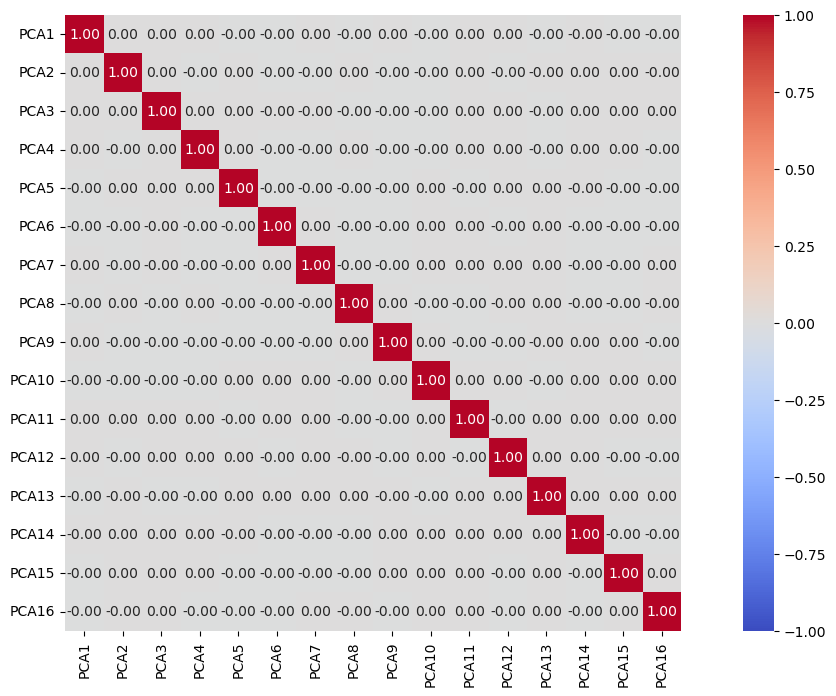

In [139]:
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)
r = associations(new_features, ax = ax, cmap = "coolwarm")

## Separation into test and training data

In [140]:
x_train,x_test,y_train,y_test = tts(new_features,target,test_size=0.20,random_state = 42)

# Machine learning Models

## 1.Logistic Regression

Training accuracy: 0.82
Test accuracy: 0.81


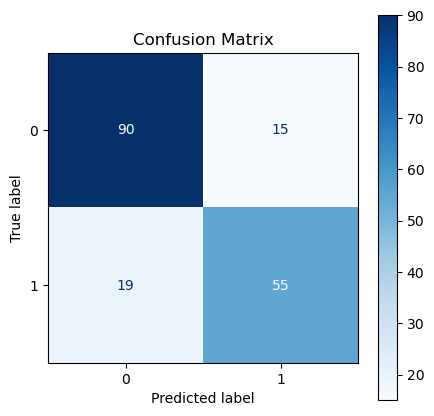

In [141]:
# Create a logistic regression model
model1 = LogisticRegression()  # Initialize the Logistic Regression model

# Fit the model to the training data
model1.fit(x_train, y_train)  # Train the model using the training features (x_train) and target (y_train)

# Make predictions on the test set
y_pred1 = model1.predict(x_test)  # Predict the target values for the test features (x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred1)  # Calculate the accuracy of the model by comparing the true values (y_test) with the predicted values (y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)  # Generate a confusion matrix to assess the classification results

# Print the model's precision (accuracy) on the training and test data
print('Training accuracy: {:.2f}'.format(model1.score(x_train, y_train)))  # Print the model's accuracy on the training data
print('Test accuracy: {:.2f}'.format(model1.score(x_test, y_test)))  # Print the model's accuracy on the test data

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)  # Create a ConfusionMatrixDisplay object using the confusion matrix

# Plot the confusion matrix
disp.plot(cmap='Blues')  # Display the matrix with a blue color map
plt.title('Confusion Matrix')  # Add a title to the plot
plt.show()  # Show the plot

## 2. Random Forest

Training accuracy: 1.00
Test accuracy: 0.83


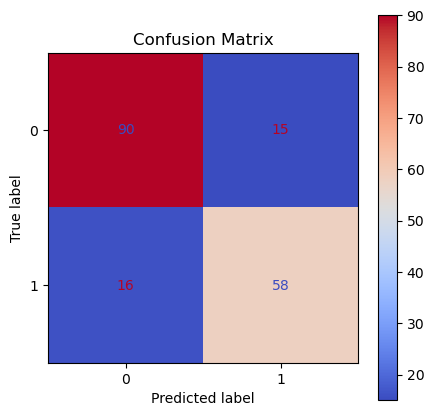

In [142]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model with 150 estimators and max depth of 200
alg_RandomForest = RandomForestClassifier(n_estimators=100, max_depth=150, n_jobs=-1)
model2 = alg_RandomForest.fit(x_train, y_train)  # Fit the model on the training data

# Make predictions on the test set
y_pred2 = model2.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)

# Print the accuracy on the training and test data
print('Training accuracy: {:.2f}'.format(model2.score(x_train, y_train)))  # Accuracy on the training data
print('Test accuracy: {:.2f}'.format(model2.score(x_test, y_test)))  # Accuracy on the test data

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)  # Generate the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)  # Create a display object for the confusion matrix
disp.plot(cmap='coolwarm')  # Plot the confusion matrix with a 'coolwarm' color map
plt.title('Confusion Matrix')  # Add a title to the plot
plt.show()  # Show the plot


## 3.Support Vector Machine

Training accuracy: 0.82
Test accuracy: 0.81


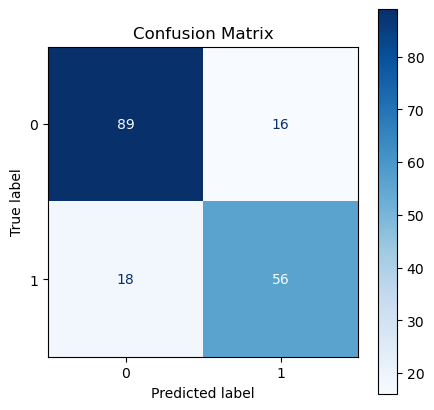

In [143]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC model (Support Vector Classification)
model3 = LinearSVC()

# Fit the model on the training data
model3.fit(x_train, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)  # Calculate the accuracy of the model
conf_matrix = confusion_matrix(y_test, y_pred3)  

# Print the accuracy on the training and test data
print('Training accuracy: {:.2f}'.format(model3.score(x_train, y_train)))  # Accuracy on the training data
print('Test accuracy: {:.2f}'.format(model3.score(x_test, y_test)))  # Accuracy on the test data

# Generate the confusion matrix

# Create and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)  # Create a display object for the confusion matrix
disp.plot(cmap='Blues')  # Plot the confusion matrix with a 'Blues' color map
plt.title('Confusion Matrix')  # Add a title to the plot
plt.show()  # Show the plot

## 4.KNN

KNN Model Accuracy (Train): 0.89
KNN Model Accuracy (Test): 0.81
Confusion Matrix for KNN:


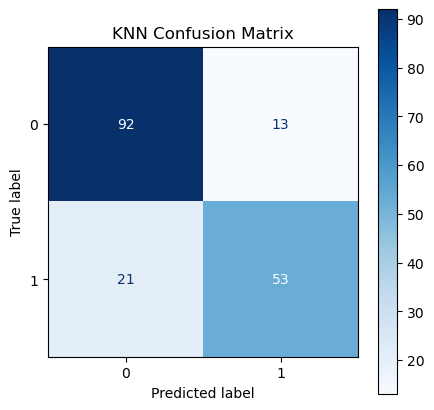

In [144]:
# Initialize KNN model with k=3 (you can choose any value for k)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model on the training data
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the accuracy
print('KNN Model Accuracy (Train): {:.2f}'.format(knn_model.score(x_train, y_train)))
print('KNN Model Accuracy (Test): {:.2f}'.format(knn_model.score(x_test, y_test)))

# Confusion Matrix Display
print("Confusion Matrix for KNN:")
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp_knn.plot(cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

## 5. Decision Tree

Decision Tree Accuracy (Train): 1.00
Decision Tree Accuracy (Test): 0.77
Confusion Matrix for Decision Tree:


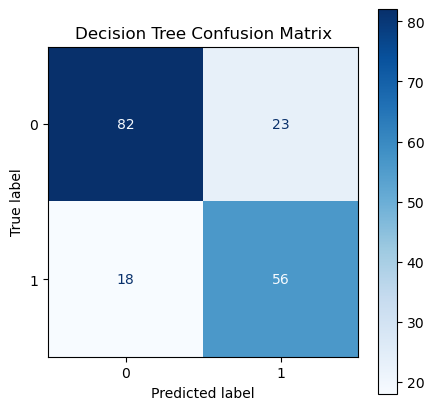

In [145]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print the accuracy
print('Decision Tree Accuracy (Train): {:.2f}'.format(dt_model.score(x_train, y_train)))
print('Decision Tree Accuracy (Test): {:.2f}'.format(dt_model.score(x_test, y_test)))

# Confusion Matrix Display
print("Confusion Matrix for Decision Tree:")
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt)
disp_dt.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

For the application on the test dataset we are going to use de randomforest model

# Application on the test dataset

In [146]:
test = pd.read_csv(r'test.csv',index_col='PassengerId')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [147]:
# Missing Data
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [148]:
# Imputation by the mean and the median
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Creation of the "Hascabin" column
test['Hascabin'] = test['Cabin'].apply(lambda x : 0 if pd.isna(x) else 1)
n_test = test.drop(columns='Cabin')
n_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Hascabin
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0


In [149]:
n_test[n_col] = n_test[n_col].apply(standart)

In [150]:
# The variable name has many values zhich can be a problem for our model if we want to apply it on another dataset
# 1. Extract the title using a regular expression
n_test['Title'] = n_test['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# 2. Replace rare titles with 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
               'Rev', 'Sir', 'Jonkheer', 'Dona']
n_test['Title'] = n_test['Title'].replace(rare_titles, 'Rare')

# 3. Standardize similar titles
n_test['Title'] = n_test['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
n_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,,
892,0.872436,"Kelly, Mr. James",male,0.334592,-0.498872,-0.399769,330911,-0.496818,Q,-0.526898,Mr
893,0.872436,"Wilkes, Mrs. James (Ellen Needs)",female,1.323944,0.616254,-0.399769,363272,-0.511665,S,-0.526898,Mrs
894,-0.315441,"Myles, Mr. Thomas Francis",male,2.511166,-0.498872,-0.399769,240276,-0.463545,Q,-0.526898,Mr
895,0.872436,"Wirz, Mr. Albert",male,-0.259019,-0.498872,-0.399769,315154,-0.481898,S,-0.526898,Mr
896,0.872436,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.654760,0.616254,0.619154,3101298,-0.416992,S,-0.526898,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,0.872436,"Spector, Mr. Woolf",male,0.000000,-0.498872,-0.399769,A.5. 3236,-0.492865,S,-0.526898,Mr
1306,-1.503319,"Oliva y Ocana, Dona. Fermina",female,0.690758,-0.498872,-0.399769,PC 17758,1.312862,C,1.893359,Rare
1307,0.872436,"Saether, Mr. Simon Sivertsen",male,0.651184,-0.498872,-0.399769,SOTON/O.Q. 3101262,-0.507189,S,-0.526898,Mr


In [151]:
n_test = he.fit_transform(n_test)  # Fit the encoder on the dataframe and transform the 'Ticket' column accordingly
n_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,,,,,,,,,,,
892,0,0,0,0,0,0,0,1,0,0,0.872436,"Kelly, Mr. James",male,0.334592,-0.498872,-0.399769,-0.496818,Q,-0.526898,Mr
893,1,0,0,0,0,0,0,0,0,0,0.872436,"Wilkes, Mrs. James (Ellen Needs)",female,1.323944,0.616254,-0.399769,-0.511665,S,-0.526898,Mrs
894,0,0,0,0,0,1,0,0,0,0,-0.315441,"Myles, Mr. Thomas Francis",male,2.511166,-0.498872,-0.399769,-0.463545,Q,-0.526898,Mr
895,0,0,0,0,0,0,0,0,1,0,0.872436,"Wirz, Mr. Albert",male,-0.259019,-0.498872,-0.399769,-0.481898,S,-0.526898,Mr
896,0,0,0,0,1,0,0,0,0,0,0.872436,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.654760,0.616254,0.619154,-0.416992,S,-0.526898,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,0,0,1,0,0,0,0,0,0.872436,"Spector, Mr. Woolf",male,0.000000,-0.498872,-0.399769,-0.492865,S,-0.526898,Mr
1306,1,0,0,0,0,0,0,0,0,0,-1.503319,"Oliva y Ocana, Dona. Fermina",female,0.690758,-0.498872,-0.399769,1.312862,C,1.893359,Rare
1307,0,0,0,0,1,0,0,0,0,0,0.872436,"Saether, Mr. Simon Sivertsen",male,0.651184,-0.498872,-0.399769,-0.507189,S,-0.526898,Mr


In [152]:
n_test= n_test.drop(columns='Name')
n_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hascabin,Title
PassengerId,,,,,,,,,,,,,,,,,,,
892,0,0,0,0,0,0,0,1,0,0,0.872436,male,0.334592,-0.498872,-0.399769,-0.496818,Q,-0.526898,Mr
893,1,0,0,0,0,0,0,0,0,0,0.872436,female,1.323944,0.616254,-0.399769,-0.511665,S,-0.526898,Mrs
894,0,0,0,0,0,1,0,0,0,0,-0.315441,male,2.511166,-0.498872,-0.399769,-0.463545,Q,-0.526898,Mr
895,0,0,0,0,0,0,0,0,1,0,0.872436,male,-0.259019,-0.498872,-0.399769,-0.481898,S,-0.526898,Mr
896,0,0,0,0,1,0,0,0,0,0,0.872436,female,-0.654760,0.616254,0.619154,-0.416992,S,-0.526898,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,0,0,1,0,0,0,0,0,0.872436,male,0.000000,-0.498872,-0.399769,-0.492865,S,-0.526898,Mr
1306,1,0,0,0,0,0,0,0,0,0,-1.503319,female,0.690758,-0.498872,-0.399769,1.312862,C,1.893359,Rare
1307,0,0,0,0,1,0,0,0,0,0,0.872436,male,0.651184,-0.498872,-0.399769,-0.507189,S,-0.526898,Mr


In [153]:
n_test=pd.get_dummies(n_test)

In [154]:
n_test

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,0,0,0,0,0,0,1,0,0,...,False,True,False,True,False,False,False,True,False,False
893,1,0,0,0,0,0,0,0,0,0,...,True,False,False,False,True,False,False,False,True,False
894,0,0,0,0,0,1,0,0,0,0,...,False,True,False,True,False,False,False,True,False,False
895,0,0,0,0,0,0,0,0,1,0,...,False,True,False,False,True,False,False,True,False,False
896,0,0,0,0,1,0,0,0,0,0,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,0,0,1,0,0,0,0,0,...,False,True,False,False,True,False,False,True,False,False
1306,1,0,0,0,0,0,0,0,0,0,...,True,False,True,False,False,False,False,False,False,True
1307,0,0,0,0,1,0,0,0,0,0,...,False,True,False,False,True,False,False,True,False,False


In [155]:
n_test.isna().sum()

col_0           0
col_1           0
col_2           0
col_3           0
col_4           0
col_5           0
col_6           0
col_7           0
col_8           0
col_9           0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Hascabin        0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
dtype: int64

In [157]:
pca = PCA().fit(n_test)  # Fit PCA to the test data

# Projecting the features onto the principal components
X_projected = pd.DataFrame(pca.transform(n_test), columns=['PCA' + str(i+1) for i in range(n_test.shape[1])])

# Selecting the first 16 principal components as new features
new_test = X_projected[['PCA' + str(i+1) for i in range(0, 16)]]

new_test

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16
0,1.032809,-0.847073,0.508416,-0.213788,0.167171,0.410506,-0.758951,0.087865,-0.485052,-0.303250,0.018833,-0.201879,0.190558,1.070627,0.213760,0.089099
1,0.360152,0.183309,0.395903,-0.359193,2.115191,-0.151547,0.075267,0.507741,0.619948,0.034354,-0.121302,-0.022821,-0.347713,-0.031790,-0.097190,-0.327357
2,-0.406082,-1.640413,1.652650,-0.748320,1.247587,0.100642,-0.312389,-0.414294,-0.826271,-0.415117,0.973579,0.021456,0.053967,0.118984,0.017291,0.274697
3,1.294919,-0.580505,0.332148,0.001300,-0.304389,0.144790,0.156330,0.387560,0.074627,-0.094819,-0.204949,-0.091836,-0.186853,-0.288048,0.863545,-0.111303
4,0.949429,1.391032,-0.407597,-0.335547,0.652546,-0.369002,0.118033,0.190749,0.943872,0.078797,-0.053680,-0.583941,0.575779,-0.036410,0.020835,0.215620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.208284,-0.656024,0.534259,-0.072958,-0.129729,0.144555,0.047659,0.404436,0.325481,-0.007429,-0.212379,-0.574130,0.508482,-0.287393,-0.173209,0.139456
414,-2.858389,-0.651862,-1.132269,-0.049812,0.023020,-0.038390,-0.536989,-0.026576,-0.031153,-0.108759,-0.235821,-0.078433,-0.390448,-0.354772,-0.327599,-0.236371
415,0.974057,-0.846510,0.904028,-0.267798,0.242604,0.149512,0.011629,0.448979,0.258549,0.000665,-0.242221,-0.579304,0.459281,-0.314766,-0.190094,0.109528
416,1.182855,-0.659807,0.480111,-0.064886,-0.152739,0.259324,0.079429,0.431875,0.038515,0.905458,0.072860,0.157065,0.030882,0.026920,0.040831,-0.103929


In [158]:
survived_predict = model2.predict(new_test)
survived_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [159]:
survived =pd.DataFrame(survived_predict, columns=['Survived'], index=test.index)
survived

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [162]:
survived.to_csv('survived.csv', index=True)